In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
nltk.download([
    "names",
    "stopwords",
    "state_union",
    "twitter_samples",
    "movie_reviews",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt",
])

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Bhumi\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhumi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\Bhumi\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Bhumi\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Bhumi\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Bhumi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up

True

In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
stopwords = nltk.corpus.stopwords.words("english")

In [3]:
CHUNK_SIZE = 100000
chunk = pd.read_csv('instagram_posts.csv',sep='\t',chunksize=CHUNK_SIZE)
words = list()
positive_count = 0
negative_count = 0
word_list = list()
for data in chunk:
    for i in data["description"]:
        sia_dict = sia.polarity_scores(str(i))
        if (sia_dict["neg"]) > 0:
            negative_count += 1
        if(sia_dict["pos"]) > 0:
            positive_count += 1
        word_list.append((str(i).replace('\\n',' ').lower()))
    break
word_list.remove('nan')
words = ' '.join(word_list)
print("Total positive posts/Total = " + str(positive_count) + "/" + str(CHUNK_SIZE))
print("Total negative posts/Total = " + str(negative_count) + "/" + str(CHUNK_SIZE))
print("Positive: Negative Ratio = ", positive_count/negative_count)

Total positive posts/Total = 28103/100000
Total negative posts/Total = 10572/100000
Positive: Negative Ratio =  2.658248202799849


In [4]:
from wordcloud import WordCloud, STOPWORDS

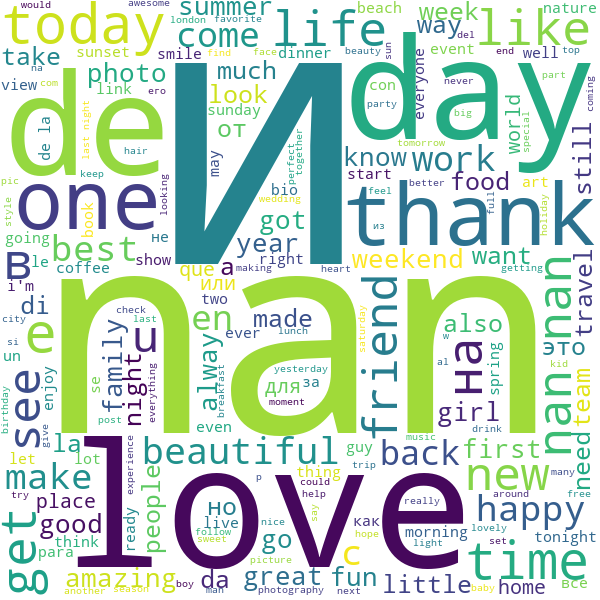

In [5]:
wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 8).generate(words)

wordcloud.to_image()